<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Loan(Prediction)_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALLING PACKAGES

1Tutorial Overview:
What is Machine Learning
Process of Machine Learning
Problem Formulation
Loading the Raw Data
Data Preprocessing
EDA
Video 2:
Data Preprocessing
Data Cleaning
Feature Selection
Splitting the Raw Data
What is Logistic Regression Analysis
Video 3:
Running Logistic Regression
Evaluating the Model

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Logistic_Regression_Dummy_Data_v3.csv to Logistic_Regression_Dummy_Data_v3.csv


In [ ]:
#load raw data
raw_data= pd.read_csv("Logistic_Regression_Dummy_Data_v3.csv",sep= ';')

#print the shape
print(raw_data.shape)

#print the table
raw_data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [ ]:
#find the info from the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1004 non-null   object 
 1   Account History        1004 non-null   object 
 2   Reason for the Loan    1003 non-null   object 
 3   Loan Amount            1003 non-null   float64
 4   Account Savings        1002 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Status      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1002 non-null   float64
 10  Residence Status       1002 non-null   object 
 11  Job                    1002 non-null   object 
 12  Completed Other loan?  1002 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 110.2+ KB


In [ ]:
#find the description from the data
raw_data.describe()

,Loan Amount,Age
count,1.003000e+03,1002.000000
mean,-5.436215e+05,35.841317
std,1.732054e+07,14.657180
min,-5.485413e+08,18.000000
25%,1.374500e+03,27.000000
50%,2.326000e+03,33.000000
75%,3.981500e+03,42.000000
max,1.842700e+04,327.000000


In [ ]:
#Checking for null values
raw_data.isnull().sum()

,0
Type of Account,2
Account History,2
Reason for the Loan,3
Loan Amount,3
Account Savings,4
Employment History,5
Individual Status,5
Other Loans,5
Security / Collateral,5
Age,4


In [ ]:
#Visualize the null values
raw_data[raw_data['Employment History'].isnull()]


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Deleting null values
raw_data = raw_data.dropna(subset =['Employment History'])

#print the shape
print(raw_data.shape)

#Visualize the null values
raw_data.isnull().sum()

(1001, 14)


,0
Type of Account,0
Account History,0
Reason for the Loan,0
Loan Amount,0
Account Savings,0
Employment History,0
Individual Status,0
Other Loans,0
Security / Collateral,0
Age,0


In [ ]:
#Investigate the element in each feature
for column in raw_data:
  unique_values = np.unique(raw_data[column])
  nr_values = len(unique_values)
  if len(unique_values) <= 10:
    print("the number of values for each feature {} is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("the number of values for each feature {} is: {}".format(column, nr_values))

the number of values for each feature Type of Account is: 4.....['No Data' 'Type A' 'Type B' 'Type C']
the number of values for each feature Account History is: 3.....['Average (known delays)' 'Good' 'critical']
the number of values for each feature Reason for the Loan is: 10.....['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
the number of values for each feature Loan Amount is: 911
the number of values for each feature Account Savings is: 5.....['0-200' '1000+' '200-500' '500-1000' 'No Data']
the number of values for each feature Employment History is: 5.....['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
the number of values for each feature Individual Status is: 5.....['Divorced' 'Female' 'Female_' 'Male' 'Married']
the number of values for each feature Other Loans is: 2.....['No' 'Yes']
the number of values for each feature Security / Colla

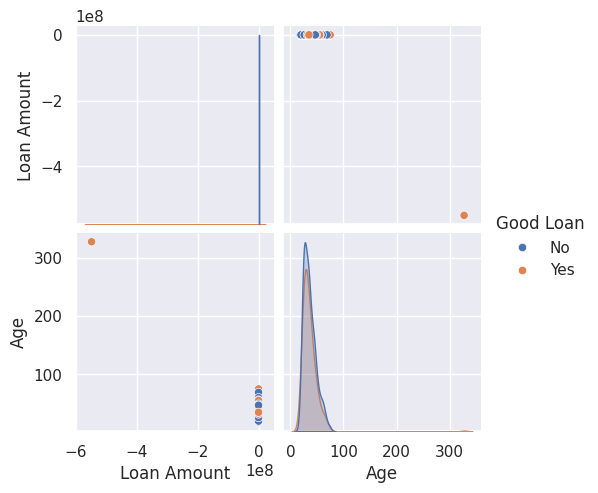

In [ ]:
#Visualize data using pairplots
import pandas as pd
import seaborn as sns
g = sns.pairplot(raw_data, hue = 'Good Loan')

In [ ]:
#Deleting the outlier
import pandas as pd
raw_data= pd.read_csv("Logistic_Regression_Dummy_Data_v3.csv",sep= ';')
raw_data = raw_data[raw_data['Age'] < 100]
raw_data.shape

(1001, 14)

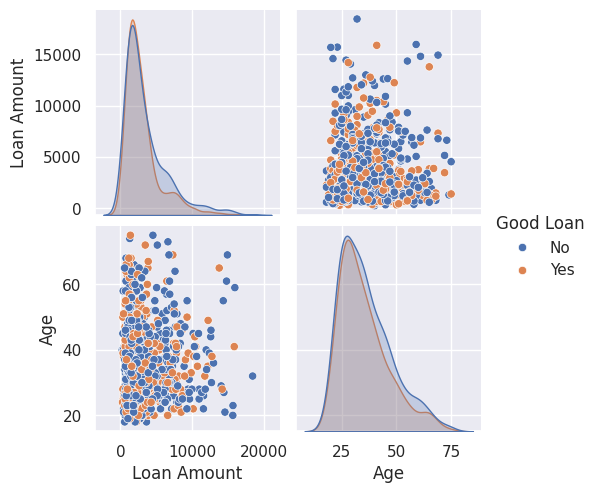

In [ ]:
#visualize the data using seaborn pairplot
import seaborn as sns
g = sns.pairplot(raw_data, hue = 'Good Loan')

<ipython-input-14-e1e042ac1f87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')


<Axes: xlabel='Good Loan', ylabel='count'>

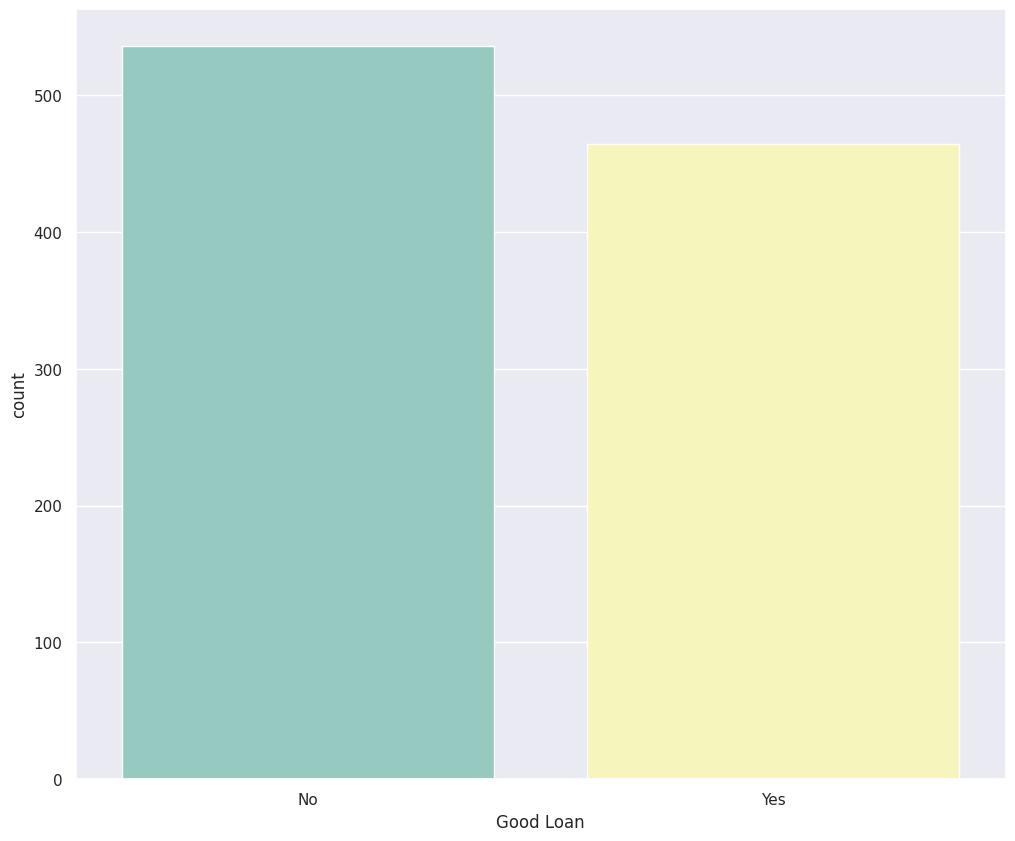

In [ ]:
#Investigating the distribution of y
sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [ ]:
raw_data.columns


Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

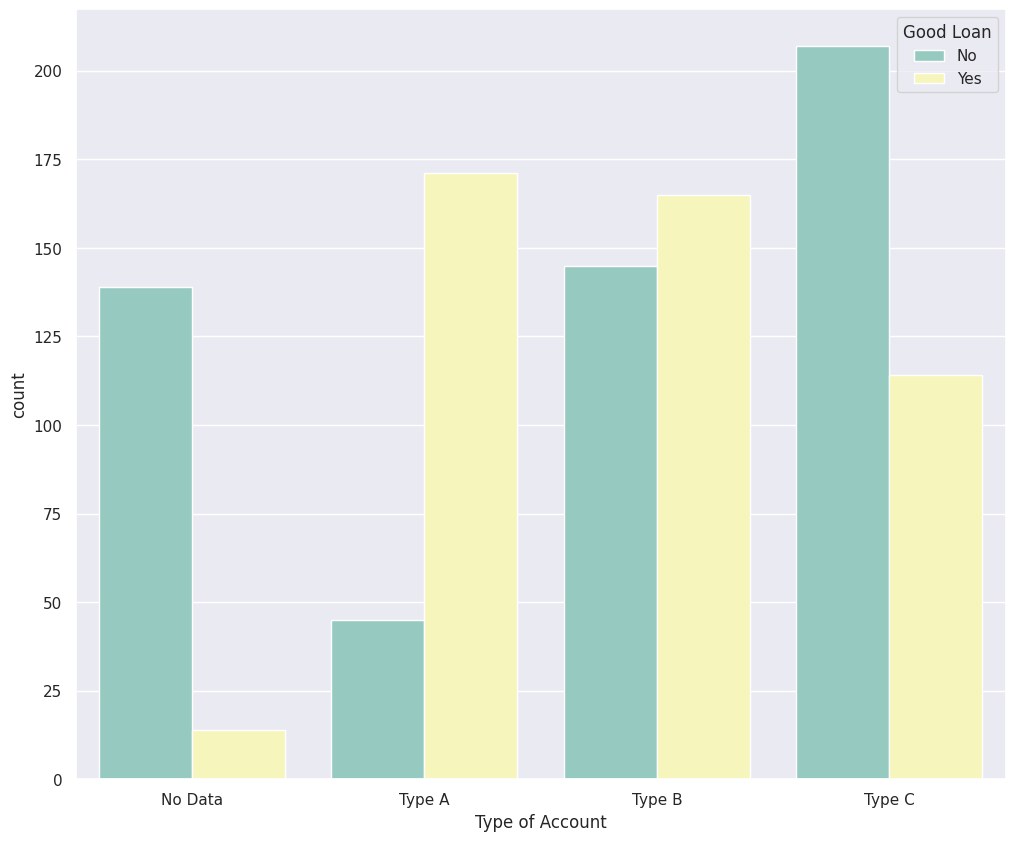

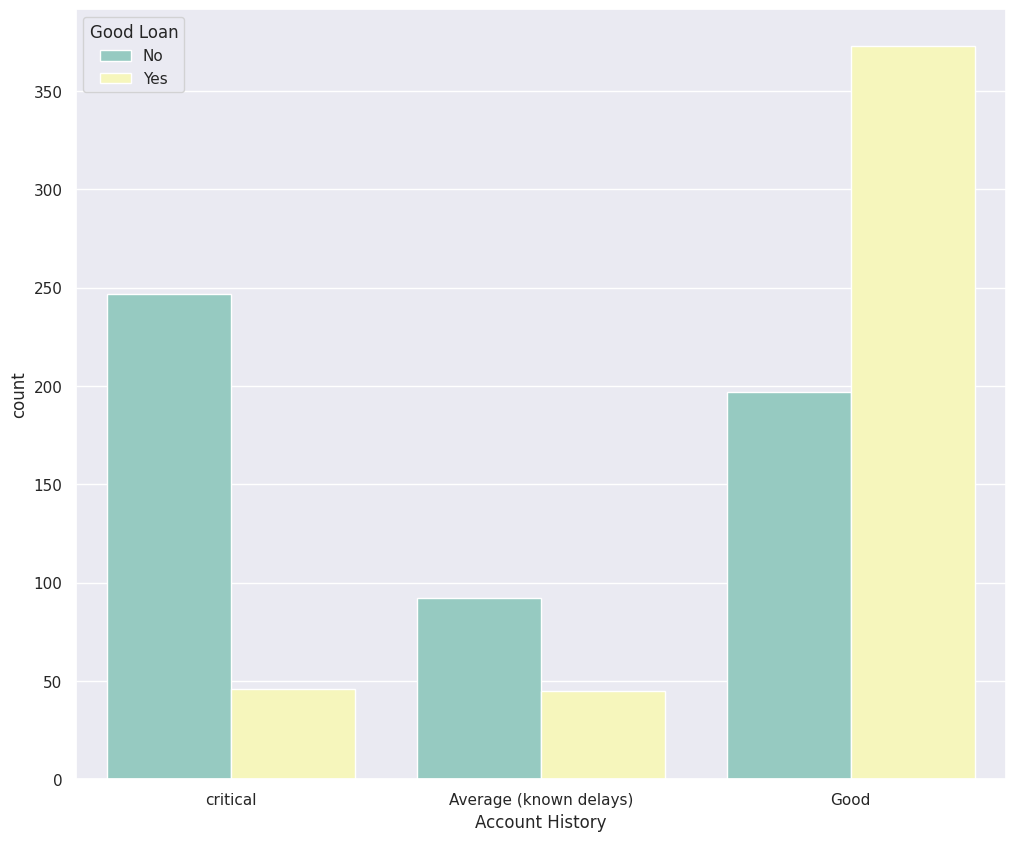

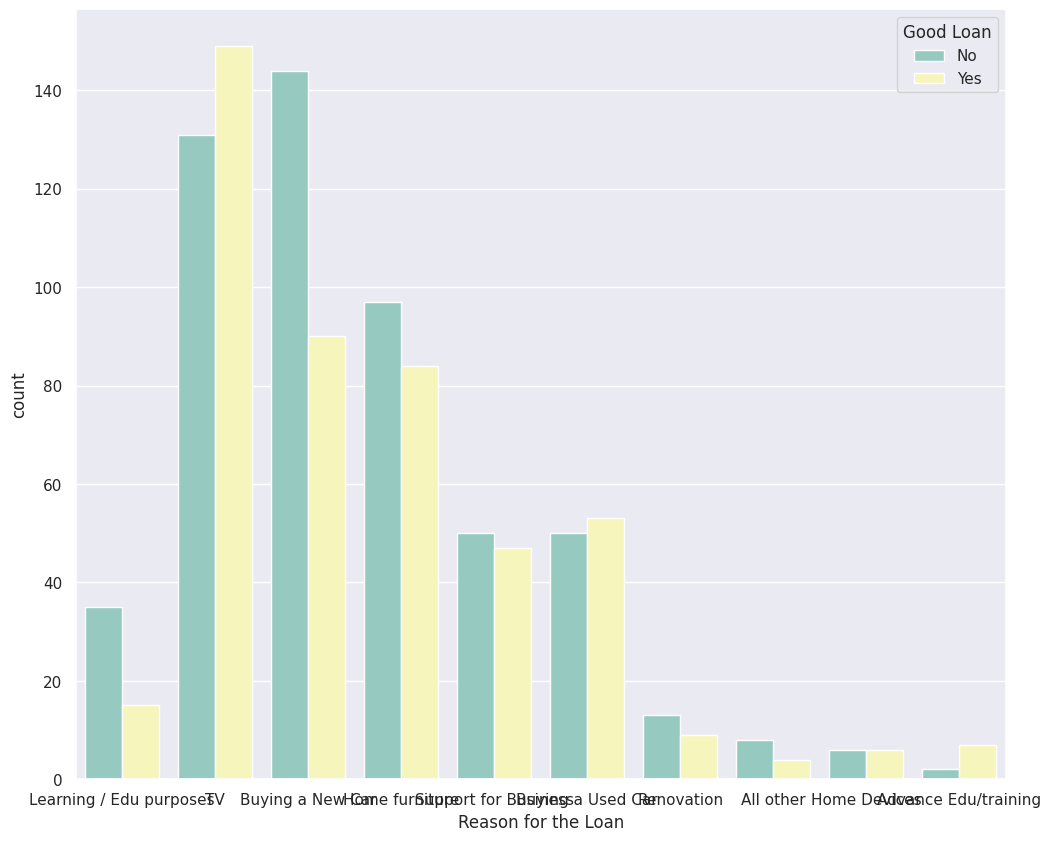

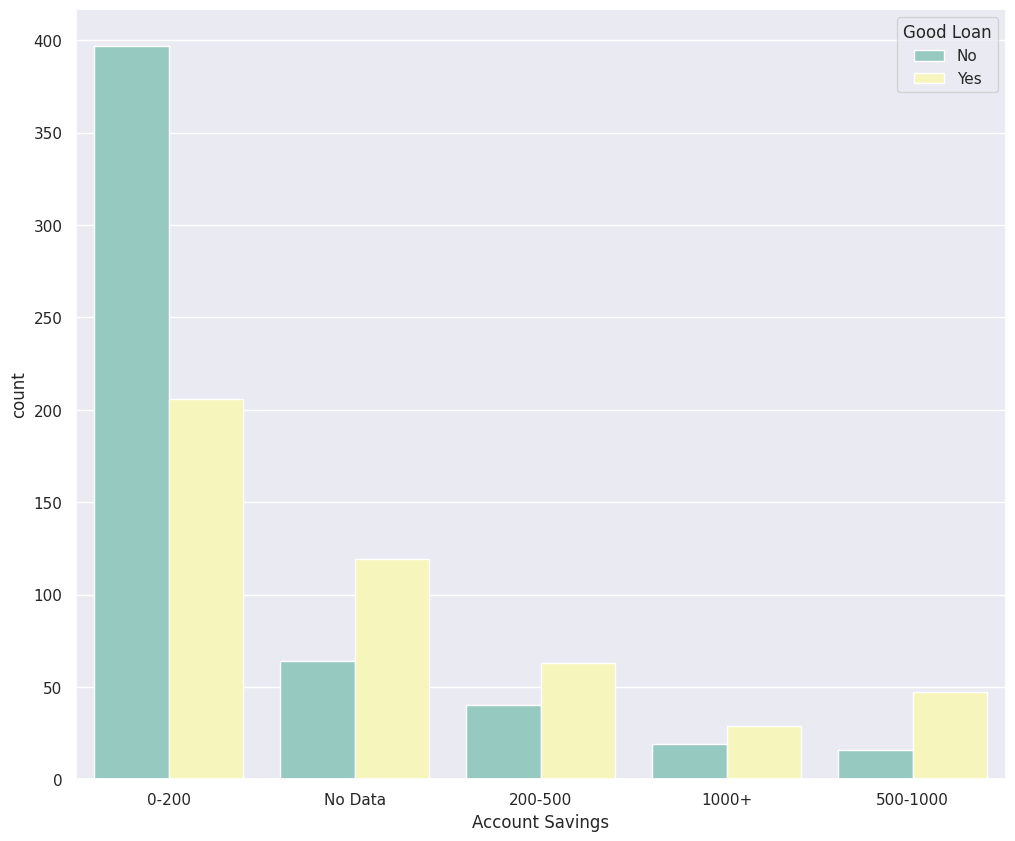

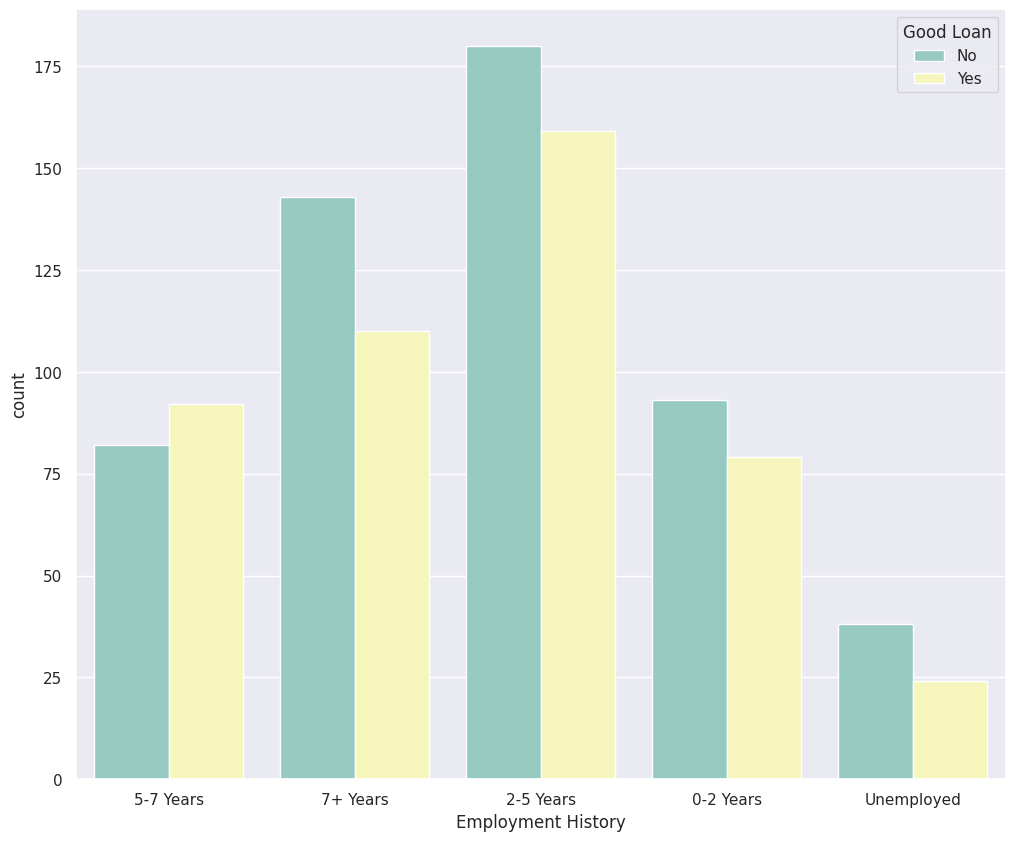

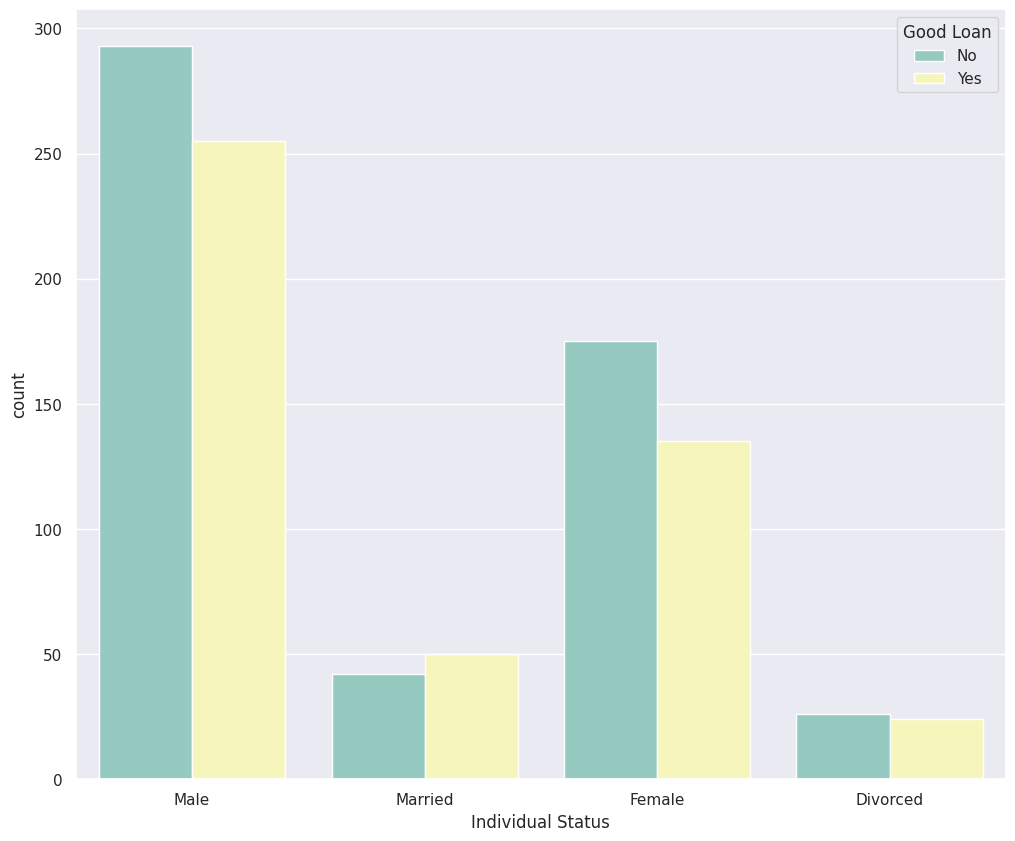

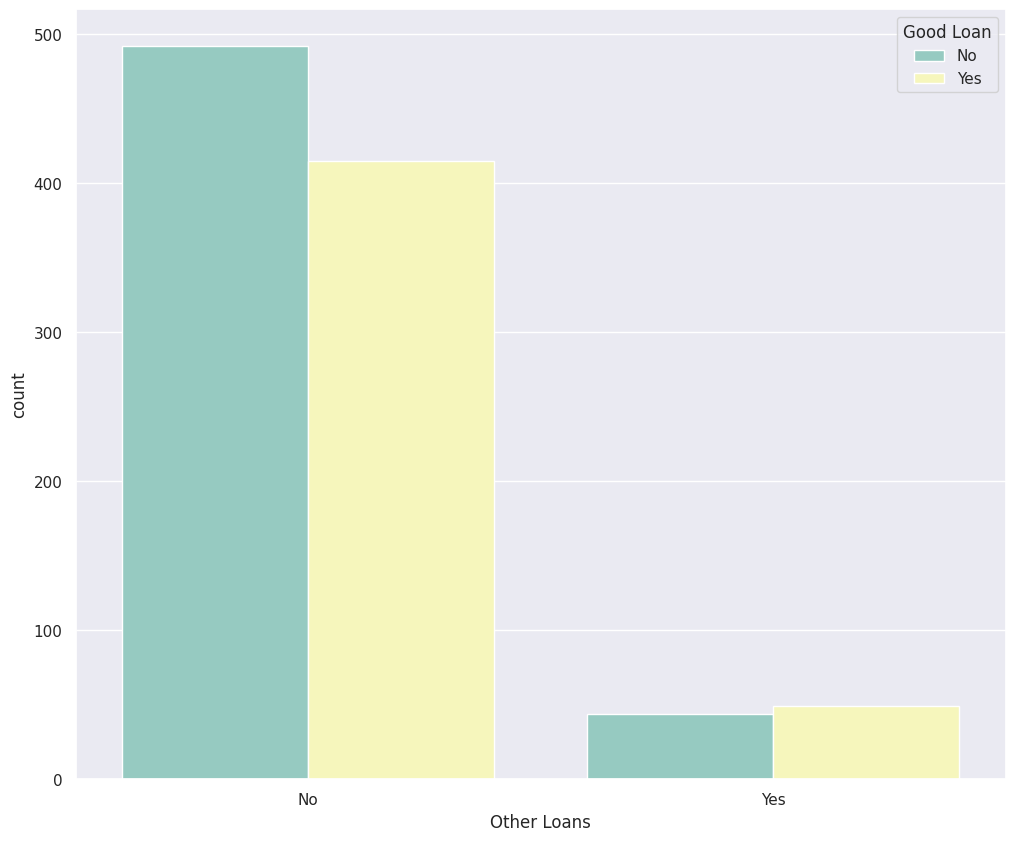

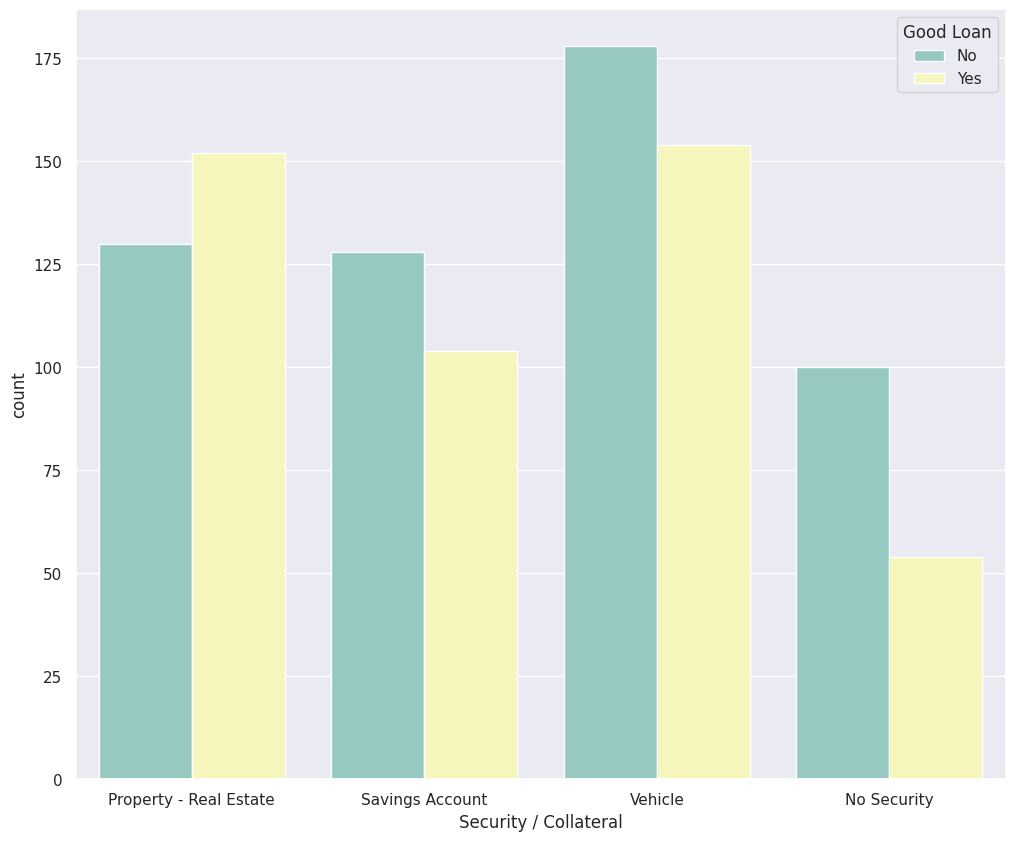

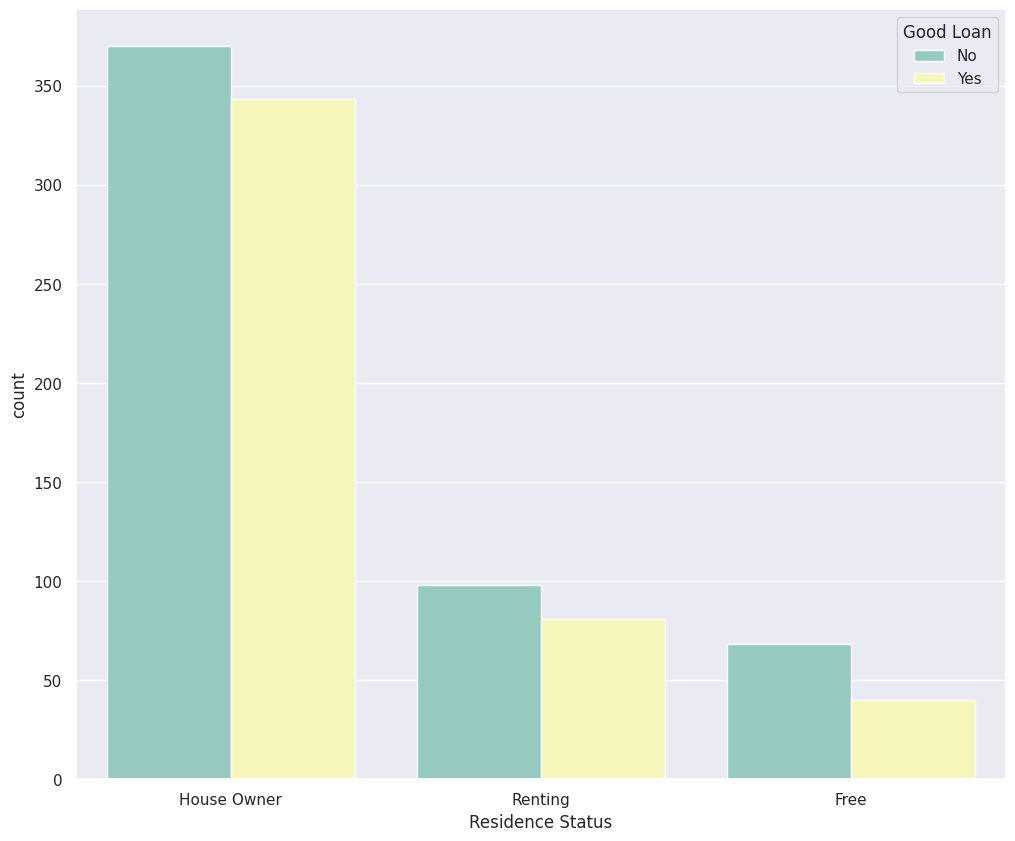

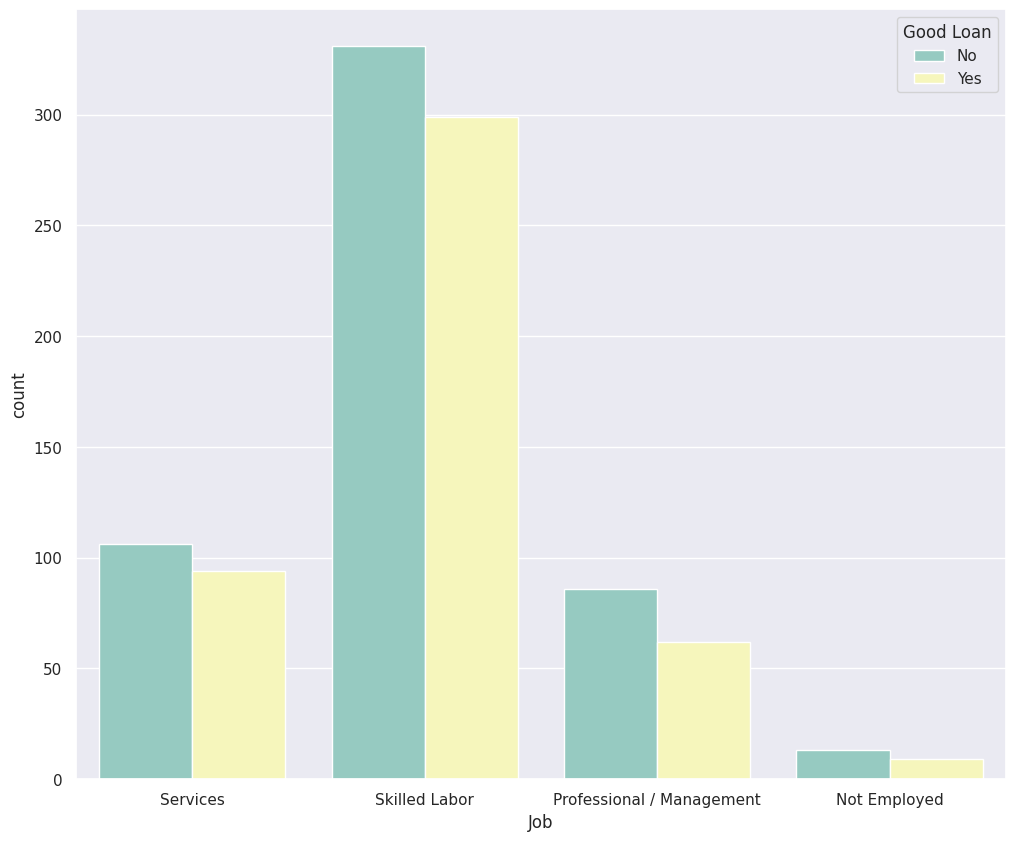

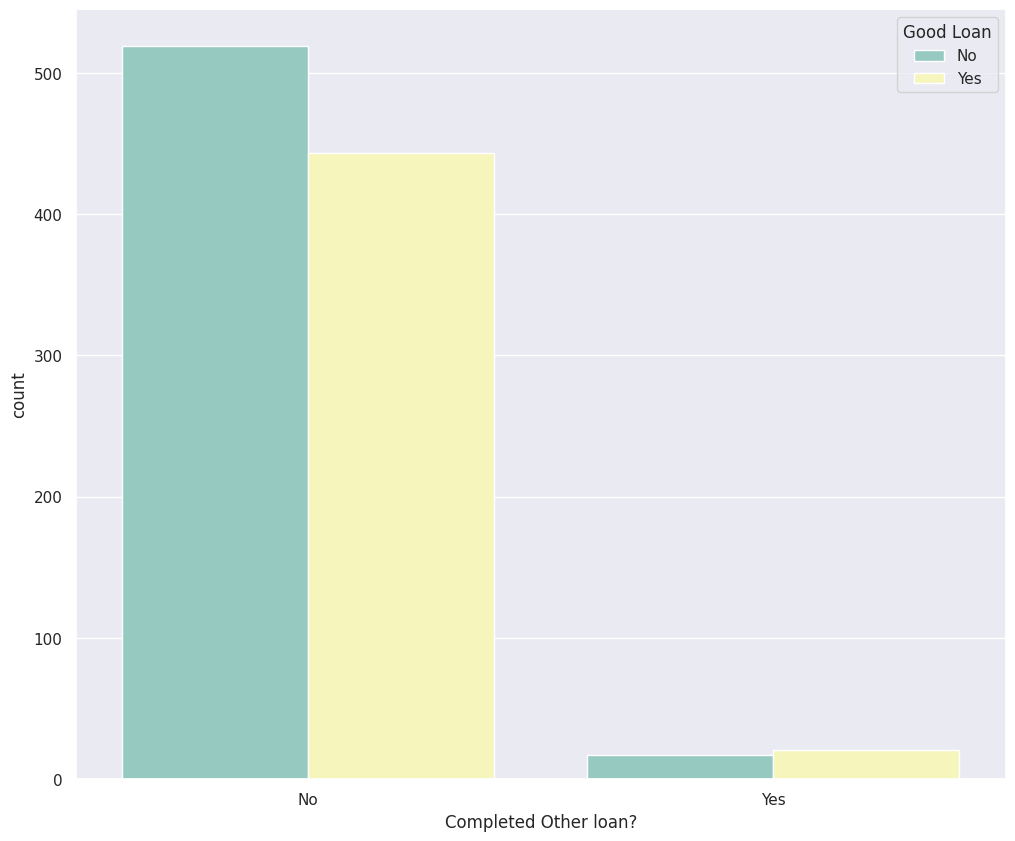

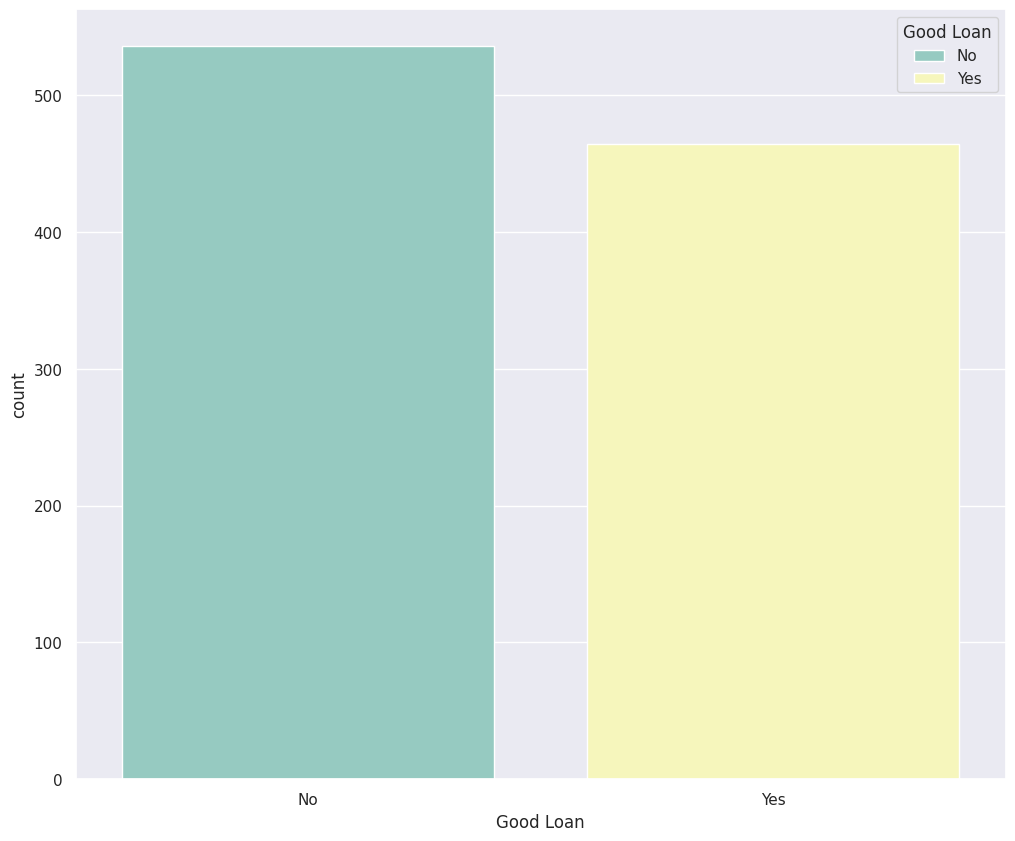

In [ ]:
# Looping through all the features by our y variable - see if there is relationship
features = ['Type of Account', 'Account History', 'Reason for the Loan',
        'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral', # Changed 'Individual Stauts' to 'Individual Status'
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan']

for f in features:
 sns.countplot(x = f, data = raw_data, hue = 'Good Loan', palette = 'Set3')
 plt.show()

In [ ]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [ ]:
#Making categorical variables into numeric representation
pd.read_csv("Logistic_Regression_Dummy_Data_v3.csv",sep= ';')
new_raw_data = pd.get_dummies(raw_data, columns = features)
new_raw_data.head()


,Loan Amount,Age,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,...,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes,Good Loan_No,Good Loan_Yes
0,2116.0,47.0,True,False,False,False,False,False,True,False,...,True,False,False,False,True,False,True,False,True,False
1,2438.0,52.0,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
2,2144.0,48.0,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,2073.0,25.0,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,True,True,False
4,1276.0,59.0,True,False,False,False,False,False,True,False,...,False,True,False,False,True,False,True,False,True,False


In [ ]:
import pandas as pd

# Load the data
raw_data = pd.read_csv("Logistic_Regression_Dummy_Data_v3.csv", sep=';')

# Specify only the categorical columns you want to convert
categorical_features = [col for col in features if col not in ['Loan Amount', 'Age', 'Good Loan']]

# Convert specified categorical features into dummy variables
new_raw_data = pd.get_dummies(raw_data, columns=categorical_features)

# Convert any boolean columns to 0 and 1
for col in new_raw_data.select_dtypes(include='bool'):
    new_raw_data[col] = new_raw_data[col].astype(int)

# Display the head of the updated DataFrame
new_raw_data.head()



,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,No,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
import pandas as pd

# Load the data
raw_data = pd.read_csv("Logistic_Regression_Dummy_Data_v3.csv", sep=';')

# Specify only the categorical columns you want to convert
categorical_features = [col for col in features if col not in ['Loan Amount', 'Age', 'Good Loan']]

# Convert specified categorical features into dummy variables
new_raw_data = pd.get_dummies(raw_data, columns=categorical_features)

# Convert any boolean columns to 0 and 1
for col in new_raw_data.select_dtypes(include='bool'):
    new_raw_data[col] = new_raw_data[col].astype(int)

# Display the head of the updated DataFrame
new_raw_data.head()

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_raw_data

<ipython-input-20-46f6510d5d73>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
<ipython-input-20-46f6510d5d73>:21: SettingWithCopyWarning: 
A value is trying to be set on a

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1003,1587.0,35.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1004,NaN,43.0,NaN,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
import pandas as pd
new_raw_data.dropna(subset = ['Good Loan'], inplace = True)
new_raw_data


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
#Split data into (x) & (y)
x = new_raw_data.drop('Good Loan', axis = 1).values
y = new_raw_data['Good Loan']

y = y.astype(int)
print(x.shape)
print(y.shape)

(1001, 50)
(1001,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(x, y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

fi_col.append(column)
fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12216092361737928
The feature importance for Age is : 0.0718434009192144
The feature importance for Type of Account_No Data is : 0.05433502378606987
The feature importance for Type of Account_Type A is : 0.049513983792648285
The feature importance for Type of Account_Type B is : 0.01869362819177081
The feature importance for Type of Account_Type C is : 0.002495544832771149
The feature importance for Account History_Average (known delays) is : 0.0
The feature importance for Account History_Good is : 0.1923157208366561
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.015752535636126264
The feature importance for Reason for the Loan_Buying a Used Car is : 0.008220644750464058
The feature importance for Reason for the Loan

In [ ]:
import pandas as pd

# Initialize lists for features and their importance values
fi_col = []
fi = []

# Populate the lists with feature names and importance scores, excluding zeros
for i, column in enumerate(new_raw_data.drop('Good Loan', axis=1)):
    importance = dt.feature_importances_[i]
    if importance > 0:  # Only include features with importance greater than 0
        print(f'The feature importance for {column} is : {importance}')
        fi_col.append(column)
        fi.append(importance)

# Create a DataFrame for the non-zero feature importances
fi_df = pd.DataFrame(zip(fi_col, fi), columns=['Feature', 'Feature Importance'])

# Sort the DataFrame by feature importance
fi_d1 = fi_df.sort_values('Feature Importance', ascending=False).reset_index(drop=True)
columns_to_keep = fi_df['Feature'][0:37]
# Display the top rows of the resulting DataFrame
fi_df


The feature importance for Loan Amount is : 0.12216092361737928
The feature importance for Age is : 0.0718434009192144
The feature importance for Type of Account_No Data is : 0.05433502378606987
The feature importance for Type of Account_Type A is : 0.049513983792648285
The feature importance for Type of Account_Type B is : 0.01869362819177081
The feature importance for Type of Account_Type C is : 0.002495544832771149
The feature importance for Account History_Good is : 0.1923157208366561
The feature importance for Reason for the Loan_Buying a New Car is : 0.015752535636126264
The feature importance for Reason for the Loan_Buying a Used Car is : 0.008220644750464058
The feature importance for Reason for the Loan_Home furniture is : 0.008732770346237474
The feature importance for Reason for the Loan_Learning / Edu purposes is : 0.003618136064969782
The feature importance for Reason for the Loan_Renovation is : 0.009585699693933351
The feature importance for Reason for the Loan_Support f

,Feature,Feature Importance
0,Loan Amount,0.122161
1,Age,0.071843
2,Type of Account_No Data,0.054335
3,Type of Account_Type A,0.049514
4,Type of Account_Type B,0.018694
5,Type of Account_Type C,0.002496
6,Account History_Good,0.192316
7,Reason for the Loan_Buying a New Car,0.015753
8,Reason for the Loan_Buying a Used Car,0.008221
9,Reason for the Loan_Home furniture,0.008733


Splitting the Raw Data - Hold-out validation

In [ ]:
# Print the shapes

print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)


(1001, 51)
(1001, 37)


In [ ]:
# Split the data into x & y

x = new_raw_data[columns_to_keep].values
x

y = new_raw_data['Good Loan']
y = y.astype(int)
y

print(x.shape)
print(y.shape)



(1001, 37)
(1001,)


In [ ]:
# first one
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =15)

# Second one
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 37)
(201, 37)
(80, 37)
(720,)
(201,)
(80,)


<ipython-input-31-610e9f644126>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_valid,  palette = "Set3")


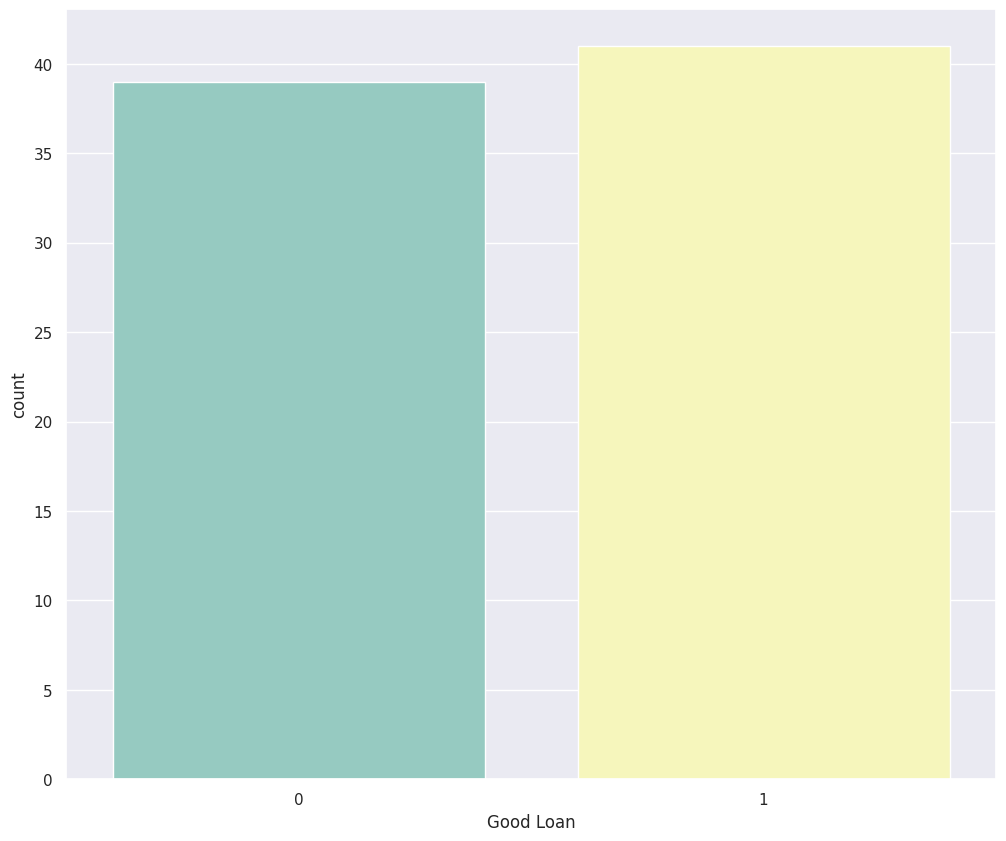

In [ ]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid,  palette = "Set3")

**7. What is Logistic Regression**


Famous statistical method for predicting two or more binary classes; not continues numbers.
Hence, Logistic regression is used for classification problems
To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data (see pics below)

In [ ]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [ ]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
log_reg.predict_proba(x_train)
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[-0.000115, 0.004550, -1.227069, 0.983632, 0.304595, -0.188574,
        2.083852, -0.694560, 0.281399, 0.131851, -0.201376, -0.156730,
        0.282661, 0.099408, -1.409316, 0.126065, 0.254770, 0.344280,
        0.556786, -0.301945, -0.273397, 0.383878, -0.019052, 0.083102,
        -0.337586, -0.002844, -0.317269, 0.189854, -0.320495, 0.336636,
        -0.065402, -0.078154, -0.090613, 0.082743, 0.039079, -0.156621,
        -0.005560]])

9. Evaluating the Model

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7916666666666666
The Testing Accuracy is:  0.736318407960199
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       394
           1       0.77      0.77      0.77       326

    accuracy                           0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

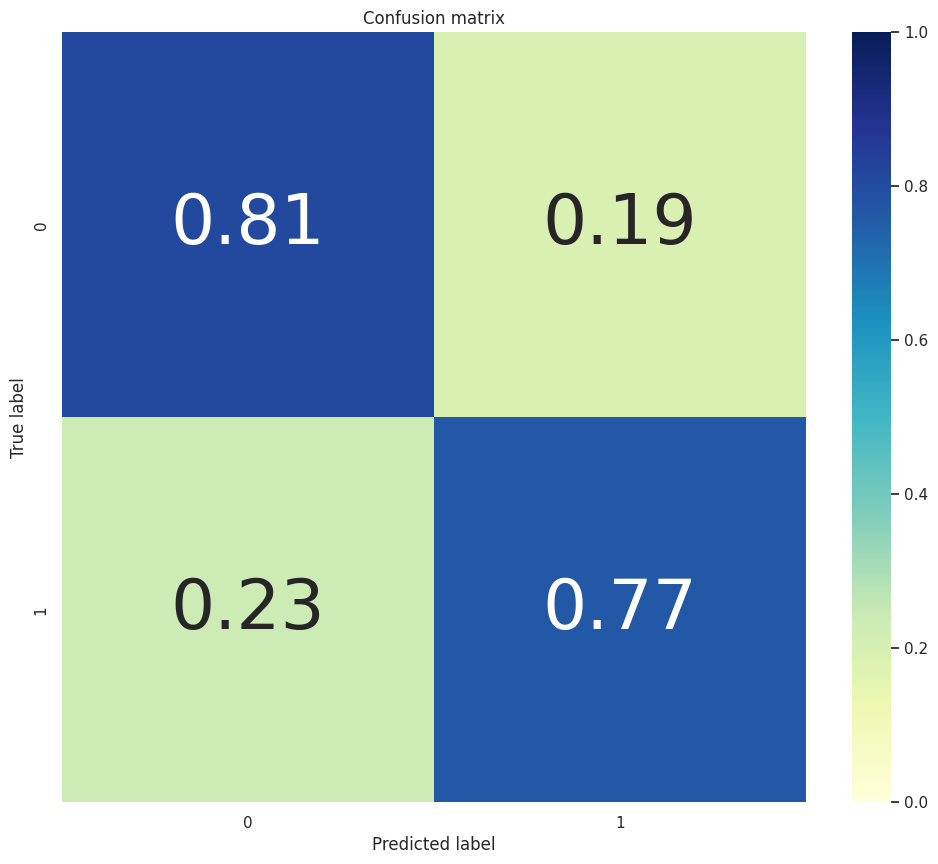

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have your y_train and y_pred defined
# y_train = ... (Your true labels)
# y_pred = ... (Your predicted labels from the model)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm

#Normalize
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)
cm_norm

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_

array([0, 1])

In [ ]:
cm.sum(axis=1)
cm_norm

array([[0.812183, 0.187817],
       [0.233129, 0.766871]])

In [ ]:
cm

array([[320,  74],
       [ 76, 250]])

In [ ]:
cm.sum(axis=0)

array([396, 324])

In [ ]:
cm.sum(axis=1)

array([394, 326])

In [ ]:
np.diag(cm)

array([320, 250])

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.812183 0.766871]
The Precision is: [0.808081 0.771605]
The False positive rate is: [0.233129 0.187817]
The False Negative Rate is:  [0.187817 0.233129]

The average TPR is: 0.7895269533804615
The average Precision is: 0.7898428731762065
The average False positive rate is: 0.21047304661953847
The average False Negative Rate is: 0.21047304661953847
